# Orders - Regression

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#import modules
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#import orders dataset
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

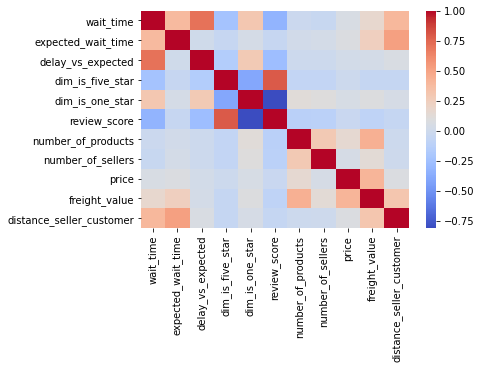

In [5]:
# Since features 'wait_time' and 'delay_vs_expected' are correlated with each other, explore each while holding 
# constant when regressing review_score against them

sns.heatmap(orders.corr(), cmap='coolwarm');

In [6]:
# Work with sample of 10,000 rows from dataset; random_state=7

sample = orders.sample(10000, random_state=7)

sample.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
68731,09d7ebb0b2075f15dc48bd8da3961fe0,15.899850,25.200058,0.0,delivered,1,0,5,1,1,49.0,15.79,648.683228
84372,848bb02f182d3cd9c820281db86fc743,18.227431,25.553623,0.0,delivered,1,0,5,1,1,59.9,16.86,698.748624
25307,b40f10c37590cd802e26b93d102f7767,14.161667,28.240127,0.0,delivered,0,1,1,1,1,149.9,18.30,144.534160
68433,565a27fae0aca550060e0f90a54495ef,7.854757,29.209664,0.0,delivered,1,0,5,1,1,149.0,41.33,943.625566
67277,bd36f36524f5f3cc085c07a839d31a37,6.376042,13.360370,0.0,delivered,1,0,5,1,1,98.9,15.79,336.663022


# Univariate regression

In [7]:
import statsmodels.formula.api as smf

In [8]:
# model1 is 'review_score' regressed on the feature'wait_time'

model1 = smf.ols('review_score ~ wait_time', data=orders).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.221e+04
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:26:33   Log-Likelihood:            -1.5630e+05
No. Observations:               96525   AIC:                         3.126e+05
Df Residuals:                   96523   BIC:                         3.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7138      0.006    725.216      0.0

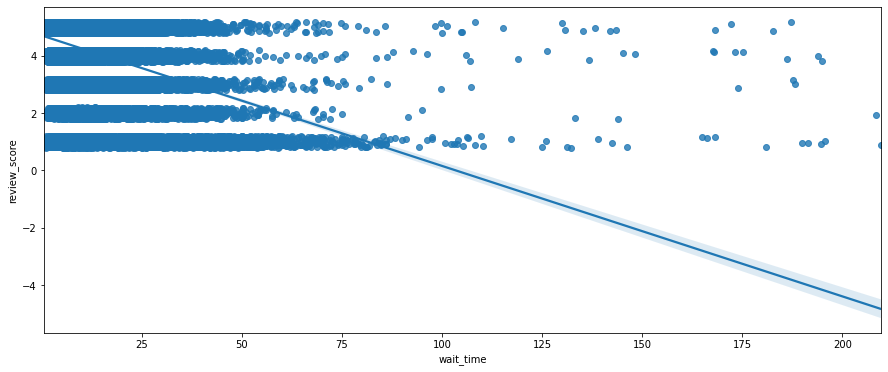

In [13]:
plt.figure(figsize=(15,6))
sns.regplot(x=orders.wait_time, y=orders.review_score, y_jitter=0.2);

**Interpretation of Results:**
- Within a 95% confidence interval, for every single day increase in 'wait_time', on average, there is a 0.0455 decrease in 'review_score'. 
- With a p-value less than 5% for our coefficient, we can say that it is statistically significant
- However, with a low R-squared value of ~11%, which indicates how much variance in 'review_score' is attributable to 'wait_time', suggests that there are other variables that have an influence.  

In [17]:
# model2 is 'review_score' regressed on feature'delay_vs_expected'

model2 = smf.ols('review_score ~ delay_vs_expected', data=orders).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7710.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:20:03   Log-Likelihood:            -1.5834e+05
No. Observations:               96525   AIC:                         3.167e+05
Df Residuals:                   96523   BIC:                         3.167e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1994      0.00

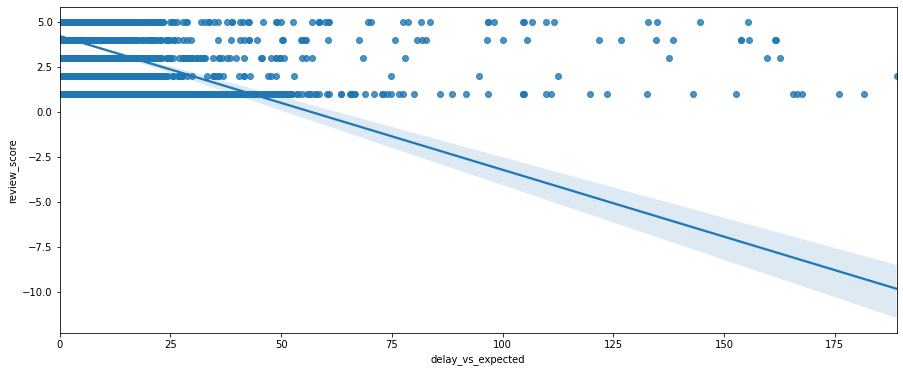

In [14]:
plt.figure(figsize=(15,6))
sns.regplot(x=orders.delay_vs_expected, y=orders.review_score);


**Interpretation of Results**
- Within a 95% confidence interval, for every single day increase in 'delay_vs_expected', on average, there is a 0.0743 decrease in 'review_score'. 
- With a p-value less than 5% for our coefficient, we can say that it is statistically significant
- However, with a low R-squared value of ~7%, this also suggests that there are other variables that contribute to the review score. 

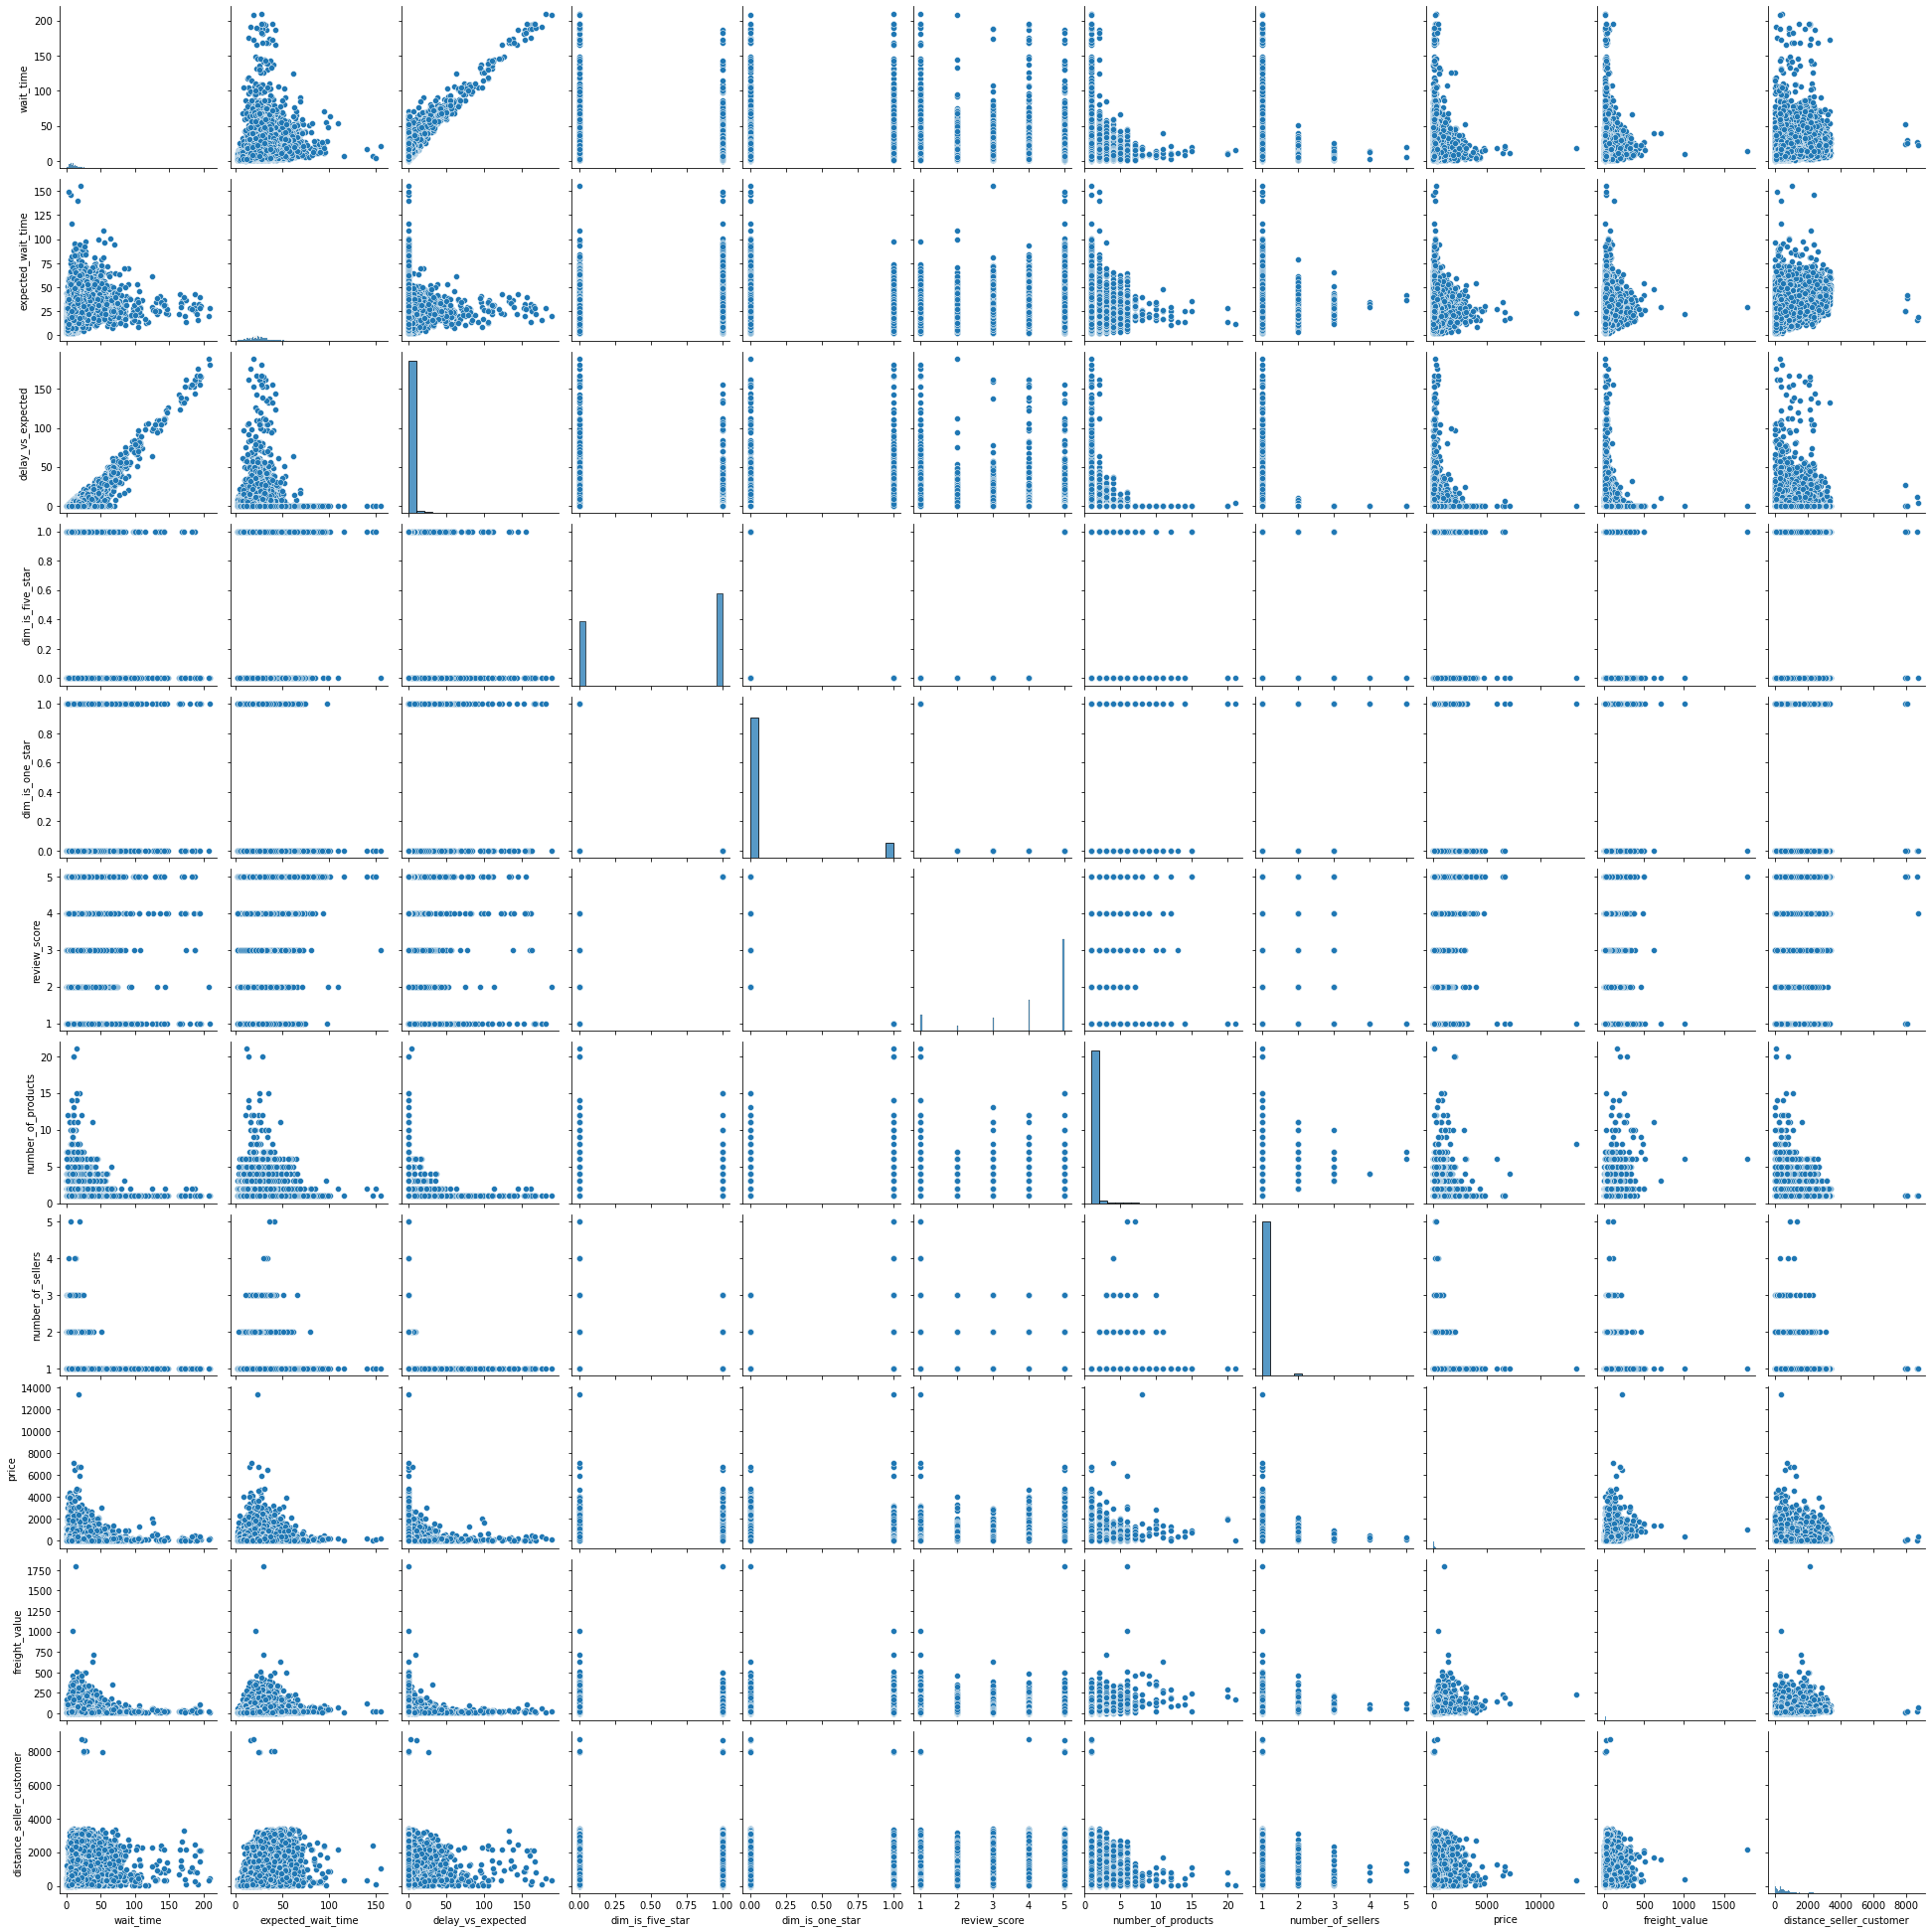

In [16]:
sns.pairplot(orders)

# Multivariate Regression

In [24]:
# model3 is dependent variable 'review_score' is regressed against independent variables'wait_time' and 'delay_vs_expected'
# but this time each independent variable is evaluated while holding the other constant

model3 = smf.ols('review_score ~ wait_time + delay_vs_expected', data=orders).fit()
print(model3.summary())

# While holding 'wait_time' constant, each additional day of 'delay_vs_expected' reduces the review_score on average by 
# partial coefficient 0.0191 points. 
#
# While holding 'delay_vs_expected' constant, each additional day of 'wait_time' reduces the review_score on average by 
# partial coefficient 0.0388 points. 
# 
# Therefore according to this multivariate analysis, additional delay is actually less impactful on review score than
# wait time. 
#
# R-squared is relatively low: only 11.5% of the variations of review_score is explained by the variation of 
# 'wait_time' and 'delay_vs_expected'


                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     6254.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:47:46   Log-Likelihood:            -1.5616e+05
No. Observations:               96525   AIC:                         3.123e+05
Df Residuals:                   96522   BIC:                         3.124e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6442      0.00

In [25]:
#model4 - adding other features to the multivariate model

features = [
    "wait_time",
    "delay_vs_expected",
    "number_of_products",
    "number_of_sellers",
    "price",
    "freight_value",
    "distance_seller_customer"]

In [26]:
# standardize features by calculating respective z-scores:   Z = (X - mu) / sigma

orders_standardized = orders.copy()
for f in features:
    mu = orders[f].mean()
    sigma = orders[f].std()
    orders_standardized[f] = orders[f].map(lambda x: (x - mu) / sigma)
orders_standardized

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,-0.431707,15.544063,-0.162787,delivered,0,0,4,-0.264004,-0.112813,-0.511860,-0.651997,-0.979467
1,53cdb2fc8bc7dce0b6741e2150273451,0.128587,19.137766,-0.162787,delivered,0,0,4,-0.264004,-0.112813,-0.087278,-0.000604,0.428808
2,47770eb9100c2d0c44946d9cf07ec65d,-0.331330,26.639711,-0.162787,delivered,1,0,5,-0.264004,-0.112813,0.109912,-0.164844,-0.146045
3,949d5b44dbf5de918fe9c16f97b45f8a,0.068497,26.188819,-0.162787,delivered,1,0,5,-0.264004,-0.112813,-0.440019,0.205392,2.052600
4,ad21c59c0840e6cb83a9ceb5573f8159,-1.014771,12.112049,-0.162787,delivered,1,0,5,-0.264004,-0.112813,-0.560153,-0.651997,-0.959121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96528,9c5dedf39a927c1b2549525ed64a053c,-0.454616,18.587442,-0.162787,delivered,1,0,5,-0.264004,-0.112813,-0.310793,-0.449712,-0.893083
96529,63943bddc261676b46f01ca7ac2f7bd8,1.010273,23.459051,-0.162787,delivered,0,0,4,-0.264004,-0.112813,0.181705,-0.124016,-0.213301
96530,83c1379a015df1e13d02aae0204711ab,1.289682,30.384225,-0.162787,delivered,1,0,5,-0.264004,-0.112813,0.330507,1.960071,0.616570
96531,11c177c8e97725db2631073c19f07b62,0.474942,37.105243,-0.162787,delivered,0,0,2,1.586072,-0.112813,1.067531,2.709822,-0.387946


In [29]:
# model4; create formula for stats.model

formula = 'review_score ~ ' + ' + ' .join(features)
formula

'review_score ~ wait_time + delay_vs_expected + number_of_products + number_of_sellers + price + freight_value + distance_seller_customer'

In [30]:
model4 = smf.ols(formula = formula, data = orders_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2348.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:11:12   Log-Likelihood:            -1.5446e+05
No. Observations:               96525   AIC:                         3.089e+05
Df Residuals:                   96517   BIC:                         3.090e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

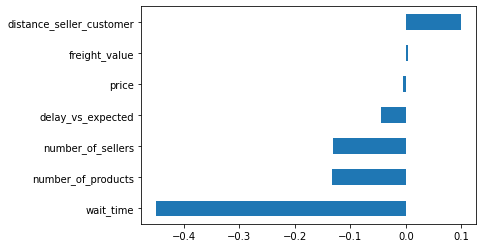

In [32]:
model4.params[1:].sort_values().plot(kind='barh');

In [33]:
model4.params

Intercept                   4.142005
wait_time                  -0.450029
delay_vs_expected          -0.044982
number_of_products         -0.132475
number_of_sellers          -0.131830
price                      -0.004405
freight_value               0.004872
distance_seller_customer    0.098776
dtype: float64

In [34]:
# the feature with the largest impact is 'wait_time'. When there are more products or sellers per order, this also
# has a negative impact on review_socre. A small impact can also be attributed to the distance between seller and
# customer. P-values for price and value are high, so may not be able to conclude anything. 
# The R-squared hasn't changed much suggesting that most of the explanability of the 'review_score' is outside of
# the orders dataset

# Check model performance

In [35]:
# Double-checking R-squared numbers by visualizing distribution of predictions in residuals

predicted_review_score = model4.predict(orders_standardized[features])
residuals = predicted_review_score - orders_standardized['review_score']

In [36]:
RMSE = (residuals.map(lambda x: x**2).sum() / len(residuals))**0.5
RMSE

1.1986853369569426

''

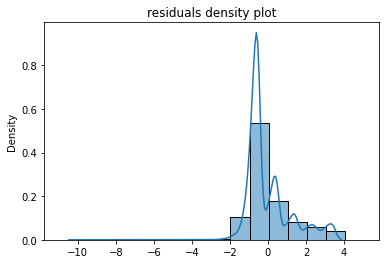

In [40]:
sns.histplot(residuals, kde=True, stat='density', discrete=True)
plt.title('residuals density plot')

;

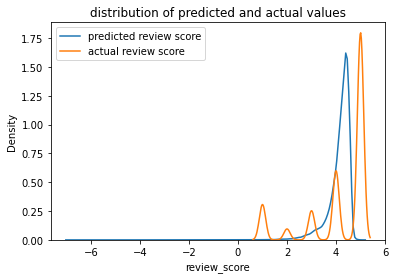

In [42]:
sns.kdeplot(predicted_review_score, label='predicted review score')
sns.kdeplot(orders.review_score, label='actual review score')
plt.title('distribution of predicted and actual values')
plt.legend();